In [1]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [2]:
image_width, image_height = 128, 128
dataset_path = './datasets/3B-XRAY-CLASSIFICATION/'
class_names = ['NORMAL', 'PNEUMONIA']
num_classes = len(class_names)

X, y = [], []

for class_name in class_names:
    for image_path in glob.glob(os.path.join(dataset_path, class_name, '*.jpeg')):
        image = tf.keras.utils.load_img(image_path, target_size=(image_width, image_height), color_mode='grayscale')
        image = tf.keras.utils.img_to_array(image)
        X.append(image)
        y.append(class_names.index(class_name))
print("Finished loading images")
        
X = np.array(X) / 255.0
y = tf.one_hot(y, num_classes).numpy()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Finished loading images


In [3]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(image_width, image_height, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=5, batch_size=32, verbose=0)

loss, acc = model.evaluate(x_test, y_test, batch_size=32, verbose=0)
print(f"Loss: {(loss*100):.2f}% | Accuracy: {(acc*100):.2f} %")

Loss: 10.66% | Accuracy: 96.48 %


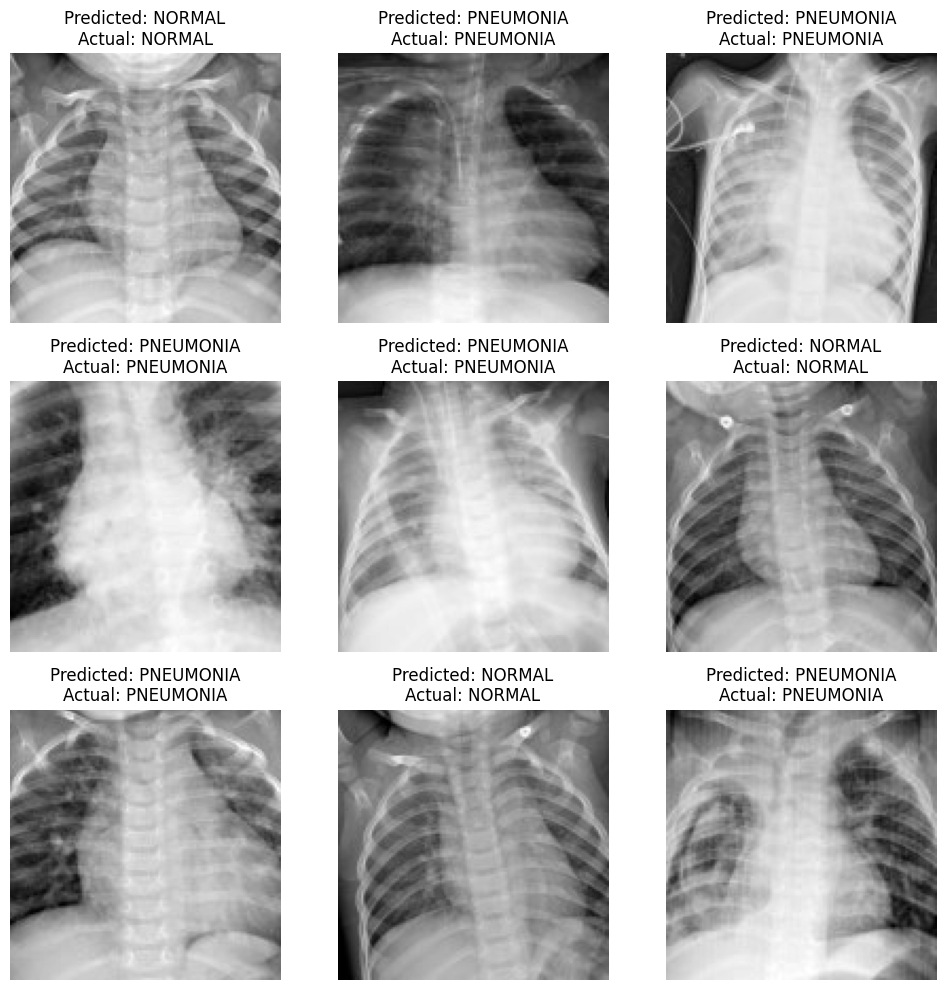

In [4]:
y_pred = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

n = 9
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
for i in range(n):
    ax = axes[i//3, i%3]
    ax.imshow(x_test[i].reshape(image_width, image_height), cmap='gray')
    ax.set_title(f"Predicted: {class_names[y_pred[i]]}\nActual: {class_names[y_test[i]]}")
    ax.axis('off')
plt.tight_layout()